This notebook can be [run on Google Colab using this link](https://colab.research.google.com/github/NEU-Silicon-Valley/CS7150-CA1/blob/main/CA1.1_Introduction.ipynb).

In [3]:
!pip install --upgrade torch torchvision torchaudio
!pip install pip install numpy==1.26.4
!pip install matplotlib
!pip install git+https://github.com/davidbau/baukit

  Cloning https://github.com/davidbau/baukit (to revision main) to /private/var/folders/n9/9f_yd6nn6x70hzv9nkyyj2nc0000gn/T/pip-install-potsp2nx/baukit_618eea476eb64978ae2328e06b272bb4
  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit /private/var/folders/n9/9f_yd6nn6x70hzv9nkyyj2nc0000gn/T/pip-install-potsp2nx/baukit_618eea476eb64978ae2328e06b272bb4
  Resolved https://github.com/davidbau/baukit to commit 9d51abd51ebf29769aecc38c4cbef459b731a36e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/openai/CLIP.git (to revision main) to /private/var/folders/n9/9f_yd6nn6x70hzv9nkyyj2nc0000gn/T/pip-install-potsp2nx/clip_67ac22a87de1498395a6ba7f11c42376
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/n9/9f_yd6nn6x70hzv9nkyyj2nc0000gn/T/pip-install-potsp2nx/clip_67ac22a87de1498395a

# Homework 1.1: Foundations, and How to Code in Pytorch

## Learning Objective

The goal of this homework is to get you familar with some of the foundational mathematical and programming tools used in deep learning, so we will review a little bit of calculus and linear algebra and introduce you to the pytorch API.

## Introduction

You may already be familiar with pytorch, and if so, great - dive in to answer the questions below.

If you are new to pytorch, your first step is to get the necessary background.  **Read and work through the notebooks in the [David's tips on how to read pytorch](https://github.com/davidbau/how-to-read-pytorch) series**, which will give you an overview of GPU usage, Autograd, optimizer classes, torch Modules, and data loading.  (Don't hand in those notebooks; no points for working through those other notebooks, though they are highly recommended and will be helpful for learning to answer the questions in the current notebook.) Hand in this current notebook completed.

## Readings

The following readings are not necessary to do this notebook, but you may find them interesting if you want to develop your sense for the origins of some of the important ideas in deep networks.

The practice of modeling a neural network as a computational object was pioneered in this classic paper by Warren McCulloch and Walter Pitts, and we will follow along with some of their constructions envisioning neural networks as graphs that can implement logic:

<a href="https://papers.baulab.info/McCullochPitts-1943.pdf">Warren S. McCulloch and Walter Pitts,
<em>A Logical Calculus of the Ideas Immanent in Nervous Activity</em>, 1943.
</a>

Pytorch is pretty new, but its modular architecture has a long history, with roots in the torch project, which is itself based on the ideas in this paper:

<a href="https://papers.baulab.info/Bottou-1990.pdf">Léon Bottou and Patrick Gallinari,
<em>A Framework for the Cooperation of Learning Algorithms</em>, 1990.
</a>

We will talk about the cross-entropy loss.  The use of cross-entropy loss for neural network training has its roots root in the late-1980s realization that often the units of measurement that should be used by neural networks are units of probability, not only because of its elegance, but also its excellent performance.

<a href="https://papers.baulab.info/Solla-1988.pdf">Sarah Solla, Esther Levin and Michael Fleisher,
<em>Accelerated Learning in Layered Neural Networks</em>, 1988.
</a>

We will play with a state-of-the-art diffusion model that was released recently.  The whole pipeline is complex, and it will take the whole semester to learn how its parts work, but a user's view of the model is descibed well in a blog post here:

<a href="https://huggingface.co/blog/stable_diffusion">Suraj Patil, Pedro Cuenca, Nathan Lambert and Patrick von Platen,
<em>Stable Diffusion with Diffusers</em>, 2022.
</a>

More papers about the diffusion model are listed in that exercise.


## Academic Integrity, Citations, and Collaborations

**In all your homework, you must explicitly cite any sources (people or any materials) you consult.**

In our class homework assignments, you should think about the problems yourself first before consulting outside help.  And when you do seek out help, we strongly advise you to find a fellow classmate to talk with and work together rather than copying an answer from the internet.  You will all learn much more by thinking collaboratively and explaining ideas to one another.

But if you are alone and stuck and you find some really useful insight on Stack Overflow or Github or a blog or some chat channel thread on Discord, it is not cheating to use and learn from that insight <em>if you cite your sources</em>.  Learning from the internet is acceptable as long as you **do not misrepresent somebody else's work as your own**.  Include citations in your writeup text or in comments in your code.

In this first exercise you will Google for a nice solution to a real problem and **make a proper citation of your source for the solution**.  In this specific problem you will only get points if you look it up and cite the source.  In general, avoid Googling and peeking at answers for homework problems, but in this problem we ask you to do it explicitly, and you should continue this practice of citing all your sources and collaborators in the future.  Linked citations are a very cool, polite, honest and useful practice in real life. In classwork, citations are *required*.


## Exercise 1.1.1: calculus review and autograd derivatives

The pytorch autograd framework is usually used to compute first derivatives, but it is perfectly capable of calculating higher order partial derivatives.  In this exercise we will try it out.

In the code below, a function $p_0(x) =$ `polynomial(x)` $= x^4 - 2 x^3 + 3 x^2 - 4 x + 5$ is given, and it is applied to a batch of 100 values of $x$ in the range $[-2, 3]$ given as `x = torch.linspace(-2.0, 3.0, 100)`.  The batch of 100 values of $p_0(x)$ is stored as `y`, and the results are plotted.

**Question 1.1**  **Fill in the formula below.**  Understand why we suggest using gradients of `y.sum()`.

If $y_i = p_0(x_i)$ and $s = \sum_i y_i$, then the gradient $\nabla_x s$ is a vector that has components $\partial s / \partial x_i$, given by:

$$
\frac{\partial s}{\partial x_i} = \boxed{4x_i^3 - 6x_i^2 + 6x_i - 4}
$$

**Question 1.2**  Fill in the code below.  To create your ground truth solutions, apply calculus by hand (just use the Power Rule) to compute the derivative of the polynomial, and put the formula in as the definition of `p1(x)`.  Plot the reults.  Do the same for `p2`, `p3` and `p4` for successive derivatives.  To plot results correctly, the results should be a batch of the same size as the input; you might need to use `torch.ones_like(x)` or `x**0` or something similar to make this work in some cases.

Then make pytorch autograd do the work.  Enable gradient computations on `x` by adding the `requires_grad` flag when it is created, and then  modify the line that defines `dy_dx` to uncomment the call to `torch.autograd.grad` and make it work.  Plot the results and make sure it looks the same as `p1`. Add more calls to `torch.autograd.grad` to compute the 2nd, 3rd, and 4th derivatives, and plot the results, and make sure they look right.  The 2nd derivative should come from applying `grad` to the 1st derivative, and so on.  Take a look at the advice about higher-order gradients from the [pytorch documentation for `torch.autograd.grad`](https://pytorch.org/docs/stable/generated/torch.autograd.grad.html#torch.autograd.grad) if you get stuck.

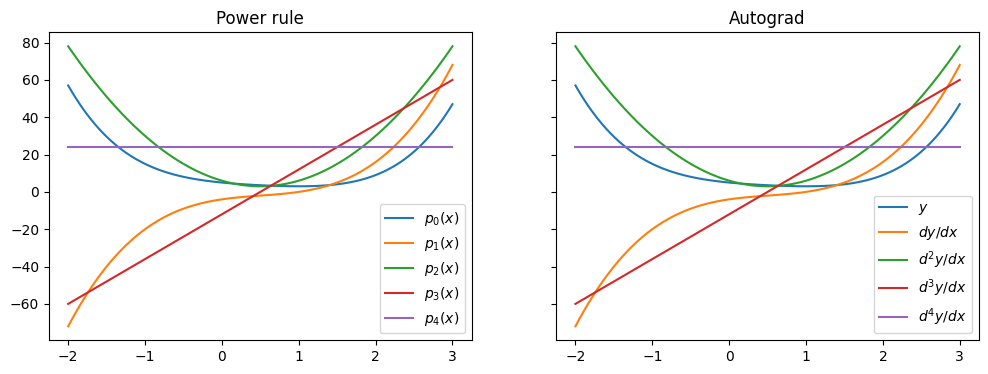

In [ ]:
import torch
import matplotlib.pyplot as plt

def polynomial(x):
    return x**4 - 2 * x**3 + 3 * x**2 - 4 * x + 5

# MODIFY THE CODE BELOW TO DEFINE p1, p2, p3, p4 and d2y_x, d3y_x, and d4y_x

def p1(x):
    return 4*x**3 - 6*x**2 + 6 * x**1 - 4
def p2(x):
    return 12*x**2 - 12*x + 6
def p3(x):
    return 24*x - 12
def p4(x):
    return 24 * torch.ones_like(x)

x = torch.linspace(-2.0, 3.0, 100, requires_grad=True) 
y = polynomial(x)

[dy_dx] = torch.autograd.grad(
    outputs=y,
    inputs=x,
    grad_outputs=torch.ones_like(y),
    create_graph=True)
[d2y_dx] = torch.autograd.grad(
    outputs=dy_dx,
    inputs=x,
    grad_outputs=torch.ones_like(dy_dx),
    create_graph=True)
[d3y_dx] = torch.autograd.grad(
    outputs=d2y_dx,
    inputs=x,
    grad_outputs=torch.ones_like(d2y_dx),
    create_graph=True)
[d4y_dx] = torch.autograd.grad(
    outputs=d3y_dx,
    inputs=x,
    grad_outputs=torch.ones_like(d3y_dx),
    create_graph=True)

# DO NOT CHANGE THE PLOTTING CODE OR TESTS BELOW

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,4), sharey=True)

with torch.no_grad():
    ax1.set_title('Power rule')
    for i in range(0, 5):
        ax1.plot(x, [polynomial, p1, p2, p3, p4][i](x), label=f'$p_{i}(x)$')
    ax1.legend()
    ax2.set_title('Autograd')
    ax2.plot(x, y, label='$y$')
    ax2.plot(x, dy_dx, label='$dy/dx$')
    for i in [2, 3, 4]:
        ax2.plot(x, [d2y_dx, d3y_dx, d4y_dx][i-2], label=f'$d^{i}y/dx$')
    ax2.legend()

assert(all((p1(x) - dy_dx).abs() < 1e-5))
assert(all((p2(x) - d2y_dx).abs() < 1e-5))
assert(all((p3(x) - d3y_dx).abs() < 1e-5))
assert(all((p4(x) - d4y_dx).abs() < 1e-5))


## Exercise 1.1.2: McCullough-Pitts Neural Networks

The modern conception of artificial neural networks is essentially the same as the model originally devised by [McCullough and Pitts in their seminal 1943 paper](https://papers.baulab.info/McCullochPitts-1943.pdf).  In that work, they observed that a biological neuron could be seen as an object that adds up its inputs, possibly weighting some inputs differently from others, and then firing an output only once some threshold is reached.  This can be modeled as a weighted sum followed by a nonlinearity:

<img src="https://github.com/NEU-Silicon-Valley/CS7150-CA1/blob/main/mp-model.png?raw=true" width="800">

McCullough and Pitts reasoned about such neurons individually or in very small networks, and they asked: what is the computational power of such networks? Can they reproduce any logical computation? We will follow along with their exploration by constructing networks for the various logical operations that can be created with two binary inputs.

We begin by creating a `torch.nn.Module` for the step-function nonlinearity.  We call it `Sign` because it is based on the `sign` function, returning `+1` for positive numbers and `-1` for negative numbers.   Like any torch `Module`, it will be a callable object.  We define the calling behavior in our `forward` method.   Notice that, as is typical in pytorch, our `Sign` module is designed to be able to operate on batches of data gathered in a `Tensor`.

In [5]:
from torch import Tensor

class Sign(torch.nn.Module):
    '''
    The Sign nonlinearity is a step function that returns +1 for all positive
    numbers and -1 for all negative numbers.  Zero stays as zero.
    '''
    def forward(self, x):
        return x.sign()

demo = Sign()
x = Tensor([-3.14, 1e-6, 0.0, -0.0])
print('Sign of', x, 'is', demo(x))

Sign of tensor([-3.1400e+00,  1.0000e-06,  0.0000e+00, -0.0000e+00]) is tensor([-1.,  1.,  0.,  0.])


Next we implement a slightly more elaborate `torch.nn.Module` for a McCullough-Pitts neuron.

The `McCulloughPittsNeuron` torch Module object computes both the weighted sum (as a `torch.nn.Linear` operation called `summation`) and the `Sign` activation nonlinearity.  The `forward` method does both steps.

The `McCulloughPittsNeuron` object can take any number of inputs; the number and names of the inputs and output are configured in the constructor, and the multiple named inputs are provided to the neuron as a dictionary contaiing `Tensor`s.  They are designed to be wired together in `torch.nn.Sequential` sequences.

Read the code below to see how to configure a small network of `McCulloughPittsNeuron`s.


In [7]:
import torch
from matplotlib import pyplot as plt
from baukit import PlotWidget, show

class McCulloughPittsNeuron(torch.nn.Module):
    '''
    A McCullough-Pitts Neuron.  It computes a weighted sum of any number of inputs,
    then it thresholds the output through a nonlinear activation step function.
    It pulls named inputs from an input dictionary and puts output into the
    dictionary.  That allows networks to be created by sequencing neurons and
    connecting them by using dictionary names.

    Examples:

        net = McCulloughPittsNeuron(
                weight_a = 0.5,
                weight_b = -0.3,
                weight_c = 2.0,
                bias     = 1.0)
        print(net(dict(
                a=Tensor([1.0]),
                b=Tensor([-1.0]),
                c=Tensor([-1.0])))['out'])

    The above creates a single neuron with three inputs a, b, and c plus some bias.
    It is invoked by providing a dictionary of all the inputs as tensors.

        net = torch.nn.Sequential(
            McCulloughPittsNeuron(weight_a=-1.0, weight_b=1.0, output_name='d'),
            McCulloughPittsNeuron(weight_b=1.0, weight_d=1.0, bias=1.0),
        )
        print(net(dict(a=Tensor([1.0]), b=Tensor([-1.0])))['out'])

    The above creates and runs a network of two neurons in this configuration:
    ```
             a -----> +----------+
                      | Neuron 0 | ---> d --+
             b ---+-> +----------+          +--> +----------+
                  |                              | Neuron 1 | ---> out
                  +----------------------------> +----------+
    ```
    As the sequence is run, the dictionary grows; after the first neuron is run,
    the dictionary contains a, b, and d.  After the second neuron is run, the
    final dictionary contains a, b, d, and out.
    '''
    def __init__(self, bias=0.0, activation=Sign, output_name='out', **kwargs):
        '''
        Construct a neuron by specifying any number of input weights in the arguments:

            weight_a:    The weight for the 'a' input.
                         Each `weight_x` in the constructor adds an input named 'x'.
            bias:        The constant bias to add to the weighted sum.
            output_name: The output name, defaults to 'out'.
            activation:  The nonlinearity to use; defaults to the "Sign" step function.
        '''
        super().__init__()

        # We use the pytorch Linear module with a one-dimenaional output
        self.summation = torch.nn.Linear(len(kwargs), 1)
        self.activation = None if activation is None else activation()
        self.output_name = output_name
        self.input_names = []
        with torch.no_grad():
            self.summation.bias[...] = bias
            for k, v in kwargs.items():
                assert k.startswith('weight_'), f'Bad argument {k}'
                self.summation.weight[0, len(self.input_names)] = v
                self.input_names.append(k[7:])

    def forward(self, inputs):
        '''
        The inputs should be a dictionary containing the expected input keys.
        The results are computed.  Then the return value will be a copy of the
        input dictionary, with the additional output tensor added.
        '''
        state = inputs.copy()
        assert self.output_name not in state, f'Multiple {self.output_name}\'s conflict'
        x = torch.stack([inputs[v] for v in self.input_names], dim=1)
        x = self.summation(x)[:,0]
        if self.activation is not None:
            x = self.activation(x)
        state[self.output_name] = x
        return state

    def extra_repr(self):
        return f'input_names={self.input_names}, output_name=\'{self.output_name}\''

def visualize_logic(nets, arg1='a', arg2='b'):
    '''
    Pass any number of McCullough-Pitts neurons or neural networks with two
    inputs named 'a' and 'b', and it will visualize all of their logic, using
    white squares to indicate +1, black squares to indicate -1, and orange
    squares to indicate intermediate values.
    '''
    grid = torch.Tensor([[
        [-1.0, 1.0],
        [-1.0, 1.0],
    ], [
        [ 1.0, 1.0],
        [-1.0,-1.0],
    ]])
    a, b = grid
    def make_viz(n, case=()):
        if isinstance(n, list):
            return [make_viz(net, case + (str(i+1),)) for i, net in enumerate(n)]
        def make_plot(fig):
            with torch.no_grad():
                out = n({arg1: a.view(-1), arg2: b.view(-1)})['out'].view(a.shape)
            [ax] = fig.axes
            ax.imshow(out, cmap='hot', extent=[-2,2,-2,2], vmin=-1, vmax=1)
            ax.invert_yaxis()
            ax.xaxis.tick_top()
            ax.tick_params(length=0)
            ax.set_xticks([-1, 1], [f'{arg1}=-1', f'{arg1}=1'])
            ax.set_yticks([-1, 1], [f'{arg2}=-1', f'{arg2}=1'])
        return [PlotWidget(make_plot, figsize=(1.1,1.1), dpi=100, bbox_inches='tight'),
                show.style(margin='0 0 20px 45%', textAlign='right'), f'case {" ".join(case)}']
    show([show.WRAP, make_viz(nets)])

Below is an example of a two small networks using the `McCulloughPittsNeuron`:  One single-neuron network, and one two-neuron network.  The behavior of the networks on $\pm 1$ input for `a` and `b` is visualized, with white for $+1$ output and black for $-1$; orange indicates an indecisive $0$.

The networks correspond to the code below:

<img src="https://github.com/NEU-Silicon-Valley/CS7150-CA1/blob/main/mp-examples.png?raw=true" width="800">

In [8]:
visualize_logic([
    # First network: just one neuron.
    McCulloughPittsNeuron(weight_a=1.0, weight_b=0.5, bias=0.5),

    # Second network: two neurons hooked together.
    torch.nn.Sequential(
        McCulloughPittsNeuron(weight_a=-1.0, weight_b=1.0, bias=0.0, output_name='d'),
        McCulloughPittsNeuron(weight_b=0.5, weight_d=0.5, bias=1.0),
    ),
])

**Question 2.1** Use `McCulloughPittsNeuron`s to implement and visualize all the following cases.
<img src="https://github.com/NEU-Silicon-Valley/CS7150-CA1/blob/main/mp-target.png?raw=true">

How many of the cases are able to be handled using a **single** neuron?  $\boxed{\text{12}}$

What are the names for the logical operations that require multiple neurons?  $\boxed{\text{XOR and XNOR}}$

Put your code for implemeintting and visualizing each of the 4 neural networks (or single-neuron networks) below:

In [ ]:
visualize_logic([
    # Case 1: a OR b. One black square at (-1, -1).
    McCulloughPittsNeuron(weight_a=1.0, weight_b=1.0, bias=1.0),
    # Case 2: One black square at (-1, 1).
    McCulloughPittsNeuron(weight_a=1.0, weight_b=-1.0, bias=1.0),
    # Case 3: a NAND b. One black square at (1, 1).
    McCulloughPittsNeuron(weight_a=-1.0, weight_b=-1.0, bias=1.0),
    # Case 4: One black square at (1, -1).
    McCulloughPittsNeuron(weight_a=-1.0, weight_b=1.0, bias=1.0),
    # Case 5: a AND b. Three black squares, one white at (1, 1).
    McCulloughPittsNeuron(weight_a=1.0, weight_b=1.0, bias=-1.0),
    # Case 6: Three black squares, one white at (1, -1).
    McCulloughPittsNeuron(weight_a=1.0, weight_b=-1.0, bias=-1.0),
    # Case 7: Three black squares, one white at (-1, -1).
    McCulloughPittsNeuron(weight_a=-1.0, weight_b=-1.0, bias=-1.0),
    # Case 8: Three black squares, one white at (-1, 1).
    McCulloughPittsNeuron(weight_a=-1.0, weight_b=1.0, bias=-1.0),
    # Case 9: Function 'a'. Black on left, white on right.
    McCulloughPittsNeuron(weight_a=1.0, weight_b=0.0, bias=0.0),
    # Case 10: Function '-b'. White on top, black on bottom.
    McCulloughPittsNeuron(weight_a=0.0, weight_b=1.0, bias=0.0),
    # Case 11: a XOR b. Not linearly separable.
    # Implemented as AND(OR(a, b), NAND(a, b)).
    torch.nn.Sequential(
        McCulloughPittsNeuron(weight_a=1.0, weight_b=1.0, bias=1.0, output_name='h1'),      # h1 = a OR b
        McCulloughPittsNeuron(weight_a=-1.0, weight_b=-1.0, bias=1.0, output_name='h2'),  # h2 = a NAND b
        McCulloughPittsNeuron(weight_h1=1.0, weight_h2=1.0, bias=-1.0),                     # out = h1 AND h2
    ),
    # Case 12: a XNOR b. Not linearly separable.
    # Implemented as NAND(OR(a, b), NAND(a, b)), which is NOT(XOR).
    torch.nn.Sequential(
        McCulloughPittsNeuron(weight_a=1.0, weight_b=1.0, bias=1.0, output_name='h1'),      # h1 = a OR b
        McCulloughPittsNeuron(weight_a=-1.0, weight_b=-1.0, bias=1.0, output_name='h2'),  # h2 = a NAND b
        McCulloughPittsNeuron(weight_h1=-1.0, weight_h2=-1.0, bias=1.0),                     # out = h1 NAND h2
    ),
    # Case 13: Function '-a'. White on left, black on right.
    McCulloughPittsNeuron(weight_a=-1.0, weight_b=0.0, bias=0.0),
    # Case 14: Function 'b'. Black on top, white on bottom.
    McCulloughPittsNeuron(weight_a=0.0, weight_b=-1, bias=0.0),
])

## Exercise 1.1.3: Softmax, KL, Cross-Entropy, and Squared Error

In the 1980's, researchers like [Sarah Solla](https://papers.baulab.info/Solla-1988.pdf) and [John Hopfield](https://papers.baulab.info/also/Hopfield-1987.pdf) discovered that networks are very effective when trained to model *probabilities* instead of just discrete binary logic.  Even in the case where the output should make a choice between two alternatives, it is often best to have the network output its estimate of the *probability distribution* of the choice to be made, rather than just a 0 or a 1.

So in modern deep learning, we will often pursue the goal of matching some true vector of discrete probabilities $y \in \mathbb{R}^{n}$ by computing some model-predicted vector of probabilities $p \in \mathbb{R}^{n}$ that is derived from some raw neural network output $z \in \mathbb{R}^{n}$, and then measuring its deviation from some true distribution $y$.

This problem of generating a predicted probability distribution $p$ to match some observed truth $y$ is is so central and common in deep networks that you should make sure you are very familiar with the specific clever functions that everybody uses to do it, and why this approach works so well.

The modeling of $p$ and the measurement of the distance to $y$ is almost always done in the same way: **softmax** and **cross-entropy**.

Here is what a the softmax-cross-entropy computation looks like, when modeling a choice between two alternatives:

<img src="https://github.com/NEU-Silicon-Valley/CS7150-CA1/blob/main/softmax-loss.png?raw=true" width=600>

On the left we have some numbers $z$ that are computed with the intention of modeling some choices in the real world.  On the right we have a categorical probablity distribution $y$ that is the true distribution of the choices actually observed in the world.  (In our figure we have just drawn two choices, but a big model could estimate a distribution over hundreds or thousands of choices.)  In the middle, we have two steps.  First, $p$ is the result of using the "softmax" function to convert the arbitrarily-scaled numbers $z_i$ to nicely-scaled numbers $p_i$ between 0 and 1 that could be interpreted as a categorical probablity distribution.  Then to summarize the difference between the calculated $p$ and the true $y$, some loss $L$ is computed, where $L$ is a single number that will be small if the vectors $p$ and $y$ are close.  When working with categorical probabilities, $L$ is almost always the cross-entropy loss function, but other choices could be used.

Below we introduce both the softmax and the cross-entropy (CE) loss function, and we also compare it to Kullback–Leibler (KL) divergence, as well as squared Euclidean vector distance, which is also known as the squared-error (SE) loss.

**Question 3.1**. Jacobians and the the softmax function.

The [**softmax** function](https://en.wikipedia.org/wiki/Softmax_function) $p = \text{softmax}(z) : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ is defined as:

$$\text{softmax}(z)_i = p_i = \frac{e^{z_{i}}}{\sum_{j} e^{z_j}}$$

It is used to convert an vector of arbitrary score numbers $z$ called *logits* into a vector $p$ that is a valid categorical probability distribution.  Fill in the following:

Write the simplest expression for the sum of $\text{softmax}(z)_i$ over all $i$:

$$\sum_i p_i = \sum_i \frac{e^{z_{i}}}{\sum_{j} e^{z_j}} = \boxed{1}$$

The input to softmax $z$ are called *logits* because they can be through of as expressing probabilities on a logistic or log scale.  Now suppose we have some new logits $z^*$ which form a vector that is shifted from $z$ by $k$ in all dimensions, where $z^*_i = z_i + k$.  How does such a shift affect the softmax?  Work it out:

Assuming we have $p = \text{softmax}(z)$, write the simplest expression for $p^* = \text{softmax}(z^*) = \text{softmax}(z + k)$ in terms of only the original $p_i$ and $k$:

$$p^*_{i} = \boxed{p_i}$$

This remarkable property means that the output of softmax does not depend so much on the specific values of $z_i$, but on the differences between the $z_i$.

It is useful to know the derivatives of softmax. Remember that the [Jacobian of a vector function](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) $f(z): \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ is the matrix

$$\mathbf{J}_{f}(z) = \left[\begin{matrix}
\frac{\partial f_1}{\partial z_1} &
\frac{\partial f_1}{\partial z_2} &
... &
\frac{\partial f_1}{\partial z_n} \\
\frac{\partial f_2}{\partial z_1} &
\frac{\partial f_2}{\partial z_2} &
... &
\frac{\partial f_2}{\partial z_n} \\
\vdots & & \ddots & \vdots \\
\frac{\partial f_m}{\partial z_1} &
\frac{\partial f_m}{\partial z_2} &
... &
\frac{\partial f_m}{\partial z_n}
\end{matrix}\right]$$


Work out the Jacobian for softmax in the case where $n=2$, writing the solutions for each partial derivative $\frac{\partial p_i}{\partial z_j}$.  Write each partial derivative it in the simplest form in terms of $p_i$ (and try to eliminate $z_i$).  It might be helpful to combine terms by using the fact that $p_1 + p_2$ is a constant.  Try to work it out yourself even though this problem is solved all over the web.  Remember to cite your sources if you get help on the internet or with an AI.


$$\mathbf{J}_{\text{softmax}}(z) =
\mathbf{J}_{p}(z) =
\left[\begin{matrix}
\frac{\partial p_1}{\partial z_1} &
\frac{\partial p_1}{\partial z_2} \\
\frac{\partial p_2}{\partial z_1} &
\frac{\partial p_2}{\partial z_2}
\end{matrix}\right] =
\left[\begin{matrix}
\boxed{p_1(1-p_1)} &
\boxed{-p_1 p_2} \\
\boxed{-p_1 p_2} &
\boxed{p_2(1-p_2)}
\end{matrix}\right]
$$

**Question 3.2**. KL divergence, Cross-entropy, and mean squared error loss.

To measure and optimize the goal of matching $p$ to some true real-world distribution $y$, we will need to define some number that summarizes the difference beween $y$ and $p$.  There are several natural possibilities to quantify the difference.  Since both $y$ and $p$ are $n$-dimensional vectors, one natural choice is to look at the squared [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the two vectors; this is known as the [**squared error** loss](https://en.wikipedia.org/wiki/Mean_squared_error):

$$\text{SE}(y, p) = || y - p ||^2 =  \sum_{i}  (y_i - p_i)^2$$

What is the value of SE if $y = p$?

$$\text{SE}(y, y) = \boxed{\text{0}}$$

What is the partial derivative of $\text{SE}(y, p)$ with respect to the $i$ th component $p_i$?  It should be possible to express the answer in terms of just $y_i$ and $p_i$.

$$\frac{\partial \, \text{SE}(y, p)}{\partial p_i} = \boxed{2(p_i - y_i)}$$

A different choice for comparing $y$ and $p$ is the famous **KL divergence** ([Wikipedia article here](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)) which is defined as

$$\text{KL}(y; p) = \sum_i y_i \log\frac{y_i}{p_i}$$

What is the value of KL divergence if $y = p$?

$$\text{KL}(y; y) = \boxed{\text{0}}$$

KL divergence can be written as the difference between entropy $\text{H}(y)= -\sum_i y_i \log y_i$ and *cross-entropy* $\text{CE}(y; p) = - \sum_i y_i \log p_i$ as follows:

$$\text{KL}(y; p) = \sum_i y_i \log y_i - \sum_i y_i \log p_i = \text{CE}(y; p) - \text{H}(y)$$
$$\text{CE}(y; p) = - \sum_i y_i \log p_i$$

Since $H(y)$ is a constant that does not depend on the model outputs $p$, the shape of the cross-entropy loss is the same as the KL loss, just shifted by a constant.  In particular, when looking at derivatives of negative CE with respect to components of $p$, they are the same as derivatives of KL with respect to components of $p$.  Let us compute some of those derivatives.

What is the partial derivative of $\text{CE}(y; p)$ with respect to the $i$ th component $p_i$?  It should be possible to express the answer in terms of just $y_i$ and $p_i$.

$$\frac{\partial \, \text{CE}(y; p)}{\partial p_i} = \boxed{- \frac{y_i}{p_i}}$$

Convince yourself that this is the same as $\frac{\partial \, \text{KL}(y; p)}{\partial p_i}$.

Let's go further back from $p_i$ and understand partial derivatives with respect to $z_i$.  Remember how the [chain rule works over vector functions](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/differentiating-vector-valued-functions/a/multivariable-chain-rule-simple-version): for example if we wish to compute $\partial L / \partial z_1$, we must consider multiple paths, both the path through $p_1$ and the path through $p_2$.

<img src="https://github.com/NEU-Silicon-Valley/CS7150-CA1/blob/main/two-partial-paths.png?raw=true" width="420">

**Question 3.3**. Gradient of negative CE (or KL) loss on softmax, and gradient of SE loss on softmax.

Using the chain rule to combine answers for 2.3 and 2.4, compute the following partial derivative of cross-entropy with respect to the first component $z_1$.  You should work to find simple expressions in terms of $p_1$ and $y_1$ instead of making a messy expression with the $z_i$.  To simplify terms, you may find it useful to remember thet $y_1 + y_2 = 1$ and $p_1 + p_2 = 1$.

$$\frac{\partial \, \text{CE}(y; p)}{\partial z_1} = \boxed{p_1 - y_1}$$

Try to work it out on your own.  If you consult the internet, please add a citation.

Next, compute the analogous partial derivative of SE with repect to $z_1$.  Again, keep the expression as simple as you can, using only $y_1$ and $p_1$ if you can.  Hint: it is a polynomial that can be written as the product of three terms.

$$\frac{\partial \, \text{SE}(y, p)}{\partial z_1} = \boxed{4(p_1 - y_1)p_1(1 - p_1)}$$

Negative CE and SE applied to softmax have a lot of similarities, but they have some significant differences in their derivatives.

Let us visualize these derivatives.

Read and run the code below and interact with the widget.  It shows how the KL, CE, and SE loss vary as a function of the logits.  If you click on the CE checkbox, you can see how negative cross entropy is parallel to the KL loss curve.


Also notice how SE is very different from KL. In particular, notice how SE loss suffers from **vanishing graidents**: it saturates in regions where the predicted answer $p$ is far from the true answer $y$.  The flatness of the SE loss means that it does not really distinguish between the quality of bad answers, and it can be hard to use SE as a guide to improve a bad answer.

Also, notice that when the target probability $y$ is imbalanced, e.g., $y=0.1$, then SE is also noticably flatter than KL at the point of minimum loss, with a much flatter curvature.  That means that SE is very accepting of not-very-good answers whereas KL does a better job at distinguishing very-good answers from slightly less-good answers.

**Question 3.4**. Plot and compare the partial derivatives of KL, and SE on softmax as well.

In the code below, the plot on the right is incomplete because it does not include the correct plot of partial dervatives for KL and SE losses.  Copy your answers from 3.3 into the proper lines of the code below to visualize the derivatives as well.

Notice that CE has exactly the same shape as KL.

The plots you make explain why cross-entropy loss typically works much better than SE in practice.  While both KL and SE are flat at the optimal point, unlike KL, SE flattens out again when the logits are far from the optimal point.  We say that SE *saturates* and suffers from a *vanishing gradient* when the system is far from the optimum.  Optimizations behave like a rolling stone: if you were to put a stone on the SE loss curve, it could easily get stuck in the high flat area of the curve.  Whereas if you put a stone on the the KL loss curve, it would be on a steeper slope and roll quickly to the bottom.

In [85]:
from baukit import PlotWidget, Range, Checkbox, show
import math
import torch

xmin, xmax = -6.0, 6.0

def compare_loss(fig, y1=0.2, dokl=True, dose=True, doce=True, dol1=True):
    # base logits grid (do NOT require grad here)
    z_base = torch.stack([
        torch.zeros(201),
        torch.linspace(xmin, xmax, 201),
    ])
    [ax1] = fig.axes
    y0 = 1.0 - y1
    p = torch.softmax(z_base, dim=0)

    kl = y0 * (math.log(y0) - torch.log(p[0])) + y1 * (math.log(y1) - torch.log(p[1]))
    ce = y0 * (-torch.log(p[0])) + y1 * (-torch.log(p[1]))
    se = ((p - torch.tensor([y0, y1])[:, None])**2).sum(0)
    sampled_l1 = (2*y0*p[1] + 2*y1*p[0])

    ax1.clear()
    ax1.set_ylim(0, 3.0)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Difference between logits $z_1 - z_0$')
    ax1.set_title(f'Loss curve on softmax when target $y_1={y1:.3f}$')

    if dokl: ax1.plot(z_base[1], kl, label='KL', color='b')
    if dose: ax1.plot(z_base[1], se, label='SE', color='r')
    if doce: ax1.plot(z_base[1], ce, label='CE', color='g', linestyle='dashed', alpha=0.6)
    if dol1: ax1.plot(z_base[1], sampled_l1, label='L1', color='orange', linestyle='dotted', alpha=0.7)
    if dokl or dose or doce or dol1: ax1.legend()

def compare_grad(fig, y1=0.2, dokl=True, dose=True):
    [ax1] = fig.axes
    y0 = 1.0 - y1

    # rebuild graph on every redraw
    z = torch.stack([
        torch.zeros(201),
        torch.linspace(xmin, xmax, 201),
    ]).detach().requires_grad_(True)  # shape [2, 201]
    p = torch.softmax(z, dim=0)
    kl = y0 * (math.log(y0) - torch.log(p[0])) + y1 * (math.log(y1) - torch.log(p[1]))
    # rebuild graph for SE
    p = torch.softmax(z, dim=0)
    se = ((p - torch.tensor([y0, y1])[:, None])**2).sum(0)
    # grads of scalars
    [g_kl] = torch.autograd.grad(kl.sum(), z, create_graph=False)
    [g_se] = torch.autograd.grad(se.sum(), z, create_graph=False)

    dkl_dz1 = g_kl[1]
    dse_dz1 = g_se[1]

    ax1.clear()
    ax1.set_ylim(-0.7, 0.7)
    ax1.set_xlim(xmin, xmax)
    ax1.set_xlabel('Difference between logits $z_1 - z_0$')
    ax1.set_title(f'Gradient of loss with respect to $z_1$ when $y_1={y1:.3f}$')

    if dokl:
        ax1.plot(z[1].detach(), dkl_dz1.detach(), color='b',
                 label=r'$\partial \mathrm{KL}/\partial z_1$ (= CE grad)')
    if dose:
        ax1.plot(z[1].detach(), dse_dz1.detach(), color='r',
                 label=r'$\partial \mathrm{SE}/\partial z_1$')
    ax1.axhline(0, color='gray', linewidth=0.5)
    if dokl or dose:
        ax1.legend(loc='upper left')

rw = Range(min=0.001, max=0.999, step=0.001, value=0.5)
bkl = Checkbox('KL', value=True)
bce = Checkbox('CE', value=False)
bse = Checkbox('SE', value=True)
bl1 = Checkbox('L1', value=False)

ploss = PlotWidget(compare_loss, y1=rw.prop('value'),
                   dokl=bkl.prop('value'), dose=bse.prop('value'),
                   doce=bce.prop('value'), dol1=bl1.prop('value'),
                   bbox_inches='tight')

pgrad = PlotWidget(compare_grad, y1=rw.prop('value'),
                   dokl=bkl.prop('value'), dose=bse.prop('value'),
                   bbox_inches='tight')

show([[show.raw_html('<div>target y<sub>1</sub> = </div>'),
      show.style(flex=12), rw, 'Include:', bkl, bce, bl1, bse],
     [ploss, pgrad]])

## Backpropagation

For part 2 of the homework, proceed to the next notebook.